In [3]:
import os 
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
from standardiser import standardise
import math
import numpy as np

RDKit WARNING: [14:40:36] Enabling RDKit 2019.09.1 jupyter extensions
[28/02/20 14:40:37 standardiser.standardise WARNING] Running under Windows: must disable use of timeout


In [2]:
DataFile = pd.read_csv('all_data.csv')
DataFile

,uid,CAS No.,SMILES,Toxicity (mg/L),species,cid
0,1,76703-62-3,C1([C@@H]([C@@H]1\C=C(\C(F)(F)F)Cl)C(=O)O[C@@H...,0.000035,LP,1
1,2,13071-79-9,S=P(OCC)(SCSC(C)(C)C)OCC,0.004000,LP,2
2,3,56-35-9,[Sn](O[Sn](CCCC)(CCCC)CCCC)(CCCC)(CCCC)CCCC,0.007600,LP,3
3,4,64628-44-0,O=C(c1ccccc1Cl)NC(=O)Nc2ccc(OC(F)(F)F)cc2,0.021000,LP,4
4,5,944-22-9,S=P(Sc1ccccc1)(OCC)CC,0.028000,LP,5
...,...,...,...,...,...,...
4140,4141,Metronidazole,Cc1ncc([N+](=O)[O-])n1CCO,1060.000000,Sheepshead Minnow,4141
4141,4142,"1,3-Dioxolane",C1COCO1,10000.000000,Sheepshead Minnow,4142
4142,4143,"2-Ethyl-2-(hydroxymethyl)-1,3-propanediol",CCC(CO)(CO)CO,14400.000000,Sheepshead Minnow,4143
4143,4144,"1,3,5-Trioxane",C1OCOCO1,16350.000000,Sheepshead Minnow,4144


In [3]:
# standarization(strip salt,metal,mixture) 
#
# standardise module has changed usage: apply --> run
standard = []
for smiles in DataFile.SMILES:
    mol = Chem.MolFromSmiles(smiles)
    try:
        parent = standardise.run(mol)
        standard.append(Chem.MolToSmiles(parent))
    except Exception as e:
        standard.append(str(e))
        
DataFile['Canonical_Smiles'] = standard
DataFile

[28/02/20 14:02:58 standardiser.neutralise WARNING] zwitterion with more negative charges than quaternary positive centres detected


,uid,CAS No.,SMILES,Toxicity (mg/L),species,cid,Canonical_Smiles
0,1,76703-62-3,C1([C@@H]([C@@H]1\C=C(\C(F)(F)F)Cl)C(=O)O[C@@H...,0.000035,LP,1,CC1(C)[C@@H](/C=C(\Cl)C(F)(F)F)[C@H]1C(=O)O[C@...
1,2,13071-79-9,S=P(OCC)(SCSC(C)(C)C)OCC,0.004000,LP,2,CCOP(=S)(OCC)SCSC(C)(C)C
2,3,56-35-9,[Sn](O[Sn](CCCC)(CCCC)CCCC)(CCCC)(CCCC)CCCC,0.007600,LP,3,No non-salt/solvate components
3,4,64628-44-0,O=C(c1ccccc1Cl)NC(=O)Nc2ccc(OC(F)(F)F)cc2,0.021000,LP,4,O=C(NC(=O)c1ccccc1Cl)Nc1ccc(OC(F)(F)F)cc1
4,5,944-22-9,S=P(Sc1ccccc1)(OCC)CC,0.028000,LP,5,CCOP(=S)(CC)Sc1ccccc1
...,...,...,...,...,...,...,...
4140,4141,Metronidazole,Cc1ncc([N+](=O)[O-])n1CCO,1060.000000,Sheepshead Minnow,4141,Cc1ncc([N+](=O)[O-])n1CCO
4141,4142,"1,3-Dioxolane",C1COCO1,10000.000000,Sheepshead Minnow,4142,C1COCO1
4142,4143,"2-Ethyl-2-(hydroxymethyl)-1,3-propanediol",CCC(CO)(CO)CO,14400.000000,Sheepshead Minnow,4143,CCC(CO)(CO)CO
4143,4144,"1,3,5-Trioxane",C1OCOCO1,16350.000000,Sheepshead Minnow,4144,C1OCOCO1


In [5]:
# manually check smiles can't be reconginized by standardiser
grouped = DataFile.groupby('Canonical_Smiles')
manual_check = pd.DataFrame()
for canonical_smiles,group in grouped:
    if 'components' in canonical_smiles or 'NoneType' in canonical_smiles:
        manual_check = pd.concat([manual_check,group],axis = 0)
manual_check.to_csv('manual_check.csv',index = False)

'''manually check some compounds in PUBCHEM'''

'manually check some compounds in PUBCHEM'

In [4]:
checked = pd.read_csv('manual_checked.csv')
from rdkit.Chem.SaltRemover import SaltRemover
final_c_s = []
for smiles in checked['Canonical_Smiles']:
    if 'components' in smiles or 'NoneType' in smiles:
        final_c_s.append(None)
    else:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            print(smiles)
        defnData = "[Cl,Br]"
        remover = SaltRemover(defnData = defnData)
        res = remover.StripMol(mol)
        final_c_s.append(Chem.MolToSmiles(res))
checked['Canonical_Smiles'] = final_c_s
checked

,uid,CAS No.,SMILES,Toxicity (mg/L),species,cid,Canonical_Smiles,pLD50
0,16,38641-94-0,C(NCC(O)=O)P(O)(=O)O.C(C)(C)N,2.00000,LP,16,None,-0.301030
1,22,76738-62-0,n1c[n@]([C@@H]([C@H](C(C)(C)C)O)Cc2ccc(cc2)Cl)...,23.60000,LP,22,None,-1.372912
2,35,137-30-4,[Zn+2].S=C([S-])N(C)C.[S-]C(=S)N(C)C,0.00097,LP,35,None,3.013228
3,65,10380-28-6,c1c2cccc([O-])c2ncc1.[Cu+2].c1c2c(ncc1)c(ccc2)...,0.24000,LP,65,None,0.619789
4,244,8018/1/7,[Mn+2].[Zn+2].[S-]C(=S)NCCNC(=S)[S-].[S-]C(=S)...,0.07400,RT,244,None,1.130768
...,...,...,...,...,...,...,...,...
133,543,56717-11-4,[N+]1(CCCCC1)(CC=C)CC[C@@H](CCCC(C)C)C.[BrH-],12.70000,RT,543,C=CC[N+]1(CCC(C)CCCC(C)C)CCCCC1,-1.103804
134,549,1910-42-5,c1(c2cc[n+](C)cc2)cc[n+](C)cc1.[ClH-].[ClH-],15.00000,RT,549,C[n+]1ccc(-c2cc[n+](C)cc2)cc1,-1.176091
135,786,288-88-0,n1cnnc1,498.00000,RT,786,c1nc[nH]n1,-2.697229
136,798,61-82-5,n1cnnc1N,1000.00000,RT,798,Nc1ncn[nH]1,-3.000000


In [5]:
DataFile = DataFile.set_index('uid')
DataFile.update(checked.set_index('uid')['Canonical_Smiles'])
DataFile = DataFile.reset_index(drop = False)

In [6]:
# unit correction
#
# toxicity mg/l -> pLD50
DataFile['pLD50'] = DataFile['Toxicity (mg/L)'].apply(lambda x:-math.log(x,10))

DataFile

,uid,CAS No.,SMILES,Toxicity (mg/L),species,cid,Canonical_Smiles,pLD50
0,1,76703-62-3,C1([C@@H]([C@@H]1\C=C(\C(F)(F)F)Cl)C(=O)O[C@@H...,0.000035,LP,1,CC1(C)[C@@H](/C=C(\Cl)C(F)(F)F)[C@H]1C(=O)O[C@...,4.455932
1,2,13071-79-9,S=P(OCC)(SCSC(C)(C)C)OCC,0.004000,LP,2,CCOP(=S)(OCC)SCSC(C)(C)C,2.397940
2,3,56-35-9,[Sn](O[Sn](CCCC)(CCCC)CCCC)(CCCC)(CCCC)CCCC,0.007600,LP,3,CCCC[Sn](CCCC)(CCCC)O[Sn](CCCC)(CCCC)CCCC,2.119186
3,4,64628-44-0,O=C(c1ccccc1Cl)NC(=O)Nc2ccc(OC(F)(F)F)cc2,0.021000,LP,4,O=C(NC(=O)c1ccccc1Cl)Nc1ccc(OC(F)(F)F)cc1,1.677781
4,5,944-22-9,S=P(Sc1ccccc1)(OCC)CC,0.028000,LP,5,CCOP(=S)(CC)Sc1ccccc1,1.552842
...,...,...,...,...,...,...,...,...
4140,4141,Metronidazole,Cc1ncc([N+](=O)[O-])n1CCO,1060.000000,Sheepshead Minnow,4141,Cc1ncc([N+](=O)[O-])n1CCO,-3.025306
4141,4142,"1,3-Dioxolane",C1COCO1,10000.000000,Sheepshead Minnow,4142,C1COCO1,-4.000000
4142,4143,"2-Ethyl-2-(hydroxymethyl)-1,3-propanediol",CCC(CO)(CO)CO,14400.000000,Sheepshead Minnow,4143,CCC(CO)(CO)CO,-4.158362
4143,4144,"1,3,5-Trioxane",C1OCOCO1,16350.000000,Sheepshead Minnow,4144,C1OCOCO1,-4.213518


In [7]:
# species
#
# BS,LP -->LP
# Sheep** --> SHM
DataFile['species'] = DataFile['species'].replace({'BS':'LP','Sheepshead Minnow':'SHM'})
DataFile['species'].unique()

array(['LP', 'RT', 'FHM', 'SHM'], dtype=object)

In [10]:
# fingerprints
#
# --> smi
smi = DataFile['Canonical_Smiles'].unique().tolist()
for smiles in DataFile['Canonical_Smiles'].unique():
    if 'components' in smiles or 'NoneType' in smiles:
        smi.remove(smiles)
pd.DataFrame(smi).to_csv('canonical_smiles.smi',index = False,header = None)

'''padel-descriptor calc fingerprints'''

'padel-descriptor calc fingerprints'

In [11]:
# --> json
import json
from tqdm import tqdm
PADELFPS = ['CDK','CDKExt','EState','GraphFP','MACCS','PubChemFP','SubFP','KRFP','AP2D']
#RDKITFPS = ['AtomPairs','Morgan','RDKFingerprint']
FP = pd.read_csv('fingerprints.csv')
FP['Canonical_Smiles'] = smi

In [12]:
'''
from rdkit.Chem import MACCSkeys,DataStructs,MolDb
for s in smi:
    mol = Chem.MolFromSmiles(s)
    #maccs = MACCSkeys.GenMACCSKeys(mol).ToBitString()
    morgan =  np.zeros((0, ), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(MolDb.FingerprintUtils.BuildMorganFP(mol),morgan)
    atompairs = np.zeros((0, ), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(MolDb.FingerprintUtils.BuildAtomPairsFP(mol),atompairs)
    rdkfp = np.zeros((0, ), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(MolDb.FingerprintUtils.BuildRDKitFP(mol),rdkfp)
'''

'\nfrom rdkit.Chem import MACCSkeys,DataStructs,MolDb\nfor s in smi:\n    mol = Chem.MolFromSmiles(s)\n    #maccs = MACCSkeys.GenMACCSKeys(mol).ToBitString()\n    morgan =  np.zeros((0, ), dtype=np.int8)\n    DataStructs.ConvertToNumpyArray(MolDb.FingerprintUtils.BuildMorganFP(mol),morgan)\n    atompairs = np.zeros((0, ), dtype=np.int8)\n    DataStructs.ConvertToNumpyArray(MolDb.FingerprintUtils.BuildAtomPairsFP(mol),atompairs)\n    rdkfp = np.zeros((0, ), dtype=np.int8)\n    DataStructs.ConvertToNumpyArray(MolDb.FingerprintUtils.BuildRDKitFP(mol),rdkfp)\n'

In [13]:
store = []
new = []
start = None
for col in FP.columns:
    if col[0:2] != start:
        store.append(new)
        new = [col]
        start = col[0:2]
    else:
        new.append(col)
assert len(store) == 11 # 9+2+1-1

In [15]:
d = {}

with tqdm(range(len(FP))) as t:
    for i in t:
        d[FP.at[i,'Canonical_Smiles']] = {
            fp:str(FP.loc[i,cols].values.tolist())
            for (fp,cols) in zip(PADELFPS,store[2:])
        }
t.close()

class int64Encoder(json.JSONEncoder):
    def default(self,obj):
        if isinstance(obj,np.int64):
            return int(obj)
        return super(int64Encoder,self).default(obj)
    
jsondata = json.dumps(d,cls = int64Encoder)

with open('FP.json','wb') as f:
    f.write(bytes(jsondata,encoding = 'utf-8'))
f.close()

100%|██████████████████████████████████████████████████████████████████████████████| 2099/2099 [02:55<00:00, 11.97it/s]


In [8]:
# remove duplicates
'''
part1
    via canonical smiles:
        herein, Pipeline Pilot is used for calculating caonincal_smiles 
    via mol:
        herein, rdkit molfromsmile is used for reconginize duplicates
part2
    toxicity 
        box plot algorithm introduces us how to find out outliers and medium\mean
'''

def count_atom(mol,atom_symbol = 'C'):
    n = 0
    for atom in mol.GetAtoms():
        s = atom.GetSymbol()
        if s == atom_symbol:
            n+=1
    return n

def get_atom_numbers(mol):
    return len(mol.GetAtoms())

DataFile['remove'] = None
DataFile['pLD50-max'] = None
DataFile['pLD50-min'] = None
DataFile['pLD50-mean'] = None
DataFile['pLD50-median'] = None
DataFile['pLD50-final'] = None
DataFile = DataFile.set_index('uid')



grouped = DataFile.groupby('Canonical_Smiles')
for canonical_smiles,group in grouped:
    if 'components' in canonical_smiles or 'NoneType' in canonical_smiles:
        group['remove'] = 'fail in standardise'
    elif (count_atom(Chem.MolFromSmiles(canonical_smiles)) >= 3)&(get_atom_numbers(Chem.MolFromSmiles(canonical_smiles))<60):
        if len(group) == 1:
            group['remove'] = None
            group['pLD50-final'] = group['pLD50']
        elif group.pLD50.to_numpy().ptp(axis = 0)<=3:
            group['remove'] = None
            group['pLD50-max'] = group['pLD50'].max()
            group['pLD50-min'] = group['pLD50'].min()
            group['pLD50-mean'] = group['pLD50'].mean()
            group['pLD50-median'] = group['pLD50'].median()
            #pld50  take mean
            group['pLD50-final'] = group['pLD50'].mean()
            #cid     take minimal uid as cid
            group['cid'] = group.index.min()
        else:
            group['remove'] = 'exceed three orders of magnitude'
            group['pLD50-max'] = group['pLD50'].max()
            group['pLD50-min'] = group['pLD50'].min()
    else:
        group['remove'] = 'C<3 or atom_num>60'
    
    DataFile.update(group)
DataFile = DataFile.reset_index(drop = False)

C:\Users\LOADIN\Anaconda3\envs\chem\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\LOADIN\Anaconda3\envs\chem\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\LOADIN\Anaconda3\envs\chem\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [9]:
DataFile.cid = DataFile.cid.apply(lambda x: int(x))
DataFile.to_csv('origin_detailed.csv',index = False)

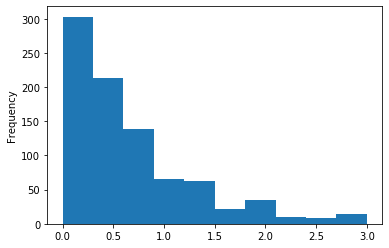

In [21]:
'''
l = []
for canonical_smiles,group in need_merge.groupby('Canonical_Smiles'):
    l.append(group.pLD50.to_numpy().ptp(axis = 0))
pd.Series(l).plot(kind = 'hist').to_image()
# distribution of max-min of same Canonical_Smiles's pLD50
'''

In [4]:
## plot all ptp and mark threshold as 3 orders of magnitude
DataFile = pd.read_csv('origin_detailed.csv')
DataFile

,uid,CAS No.,SMILES,Toxicity (mg/L),species,cid,Canonical_Smiles,pLD50,remove,pLD50-max,pLD50-min,pLD50-mean,pLD50-median,pLD50-final
0,1,76703-62-3,C1([C@@H]([C@@H]1\C=C(\C(F)(F)F)Cl)C(=O)O[C@@H...,0.000035,LP,1,CC1(C)[C@@H](/C=C(\Cl)C(F)(F)F)[C@H]1C(=O)O[C@...,4.455932,NaN,4.543634,4.142668,4.380744,4.455932,4.380744
1,2,13071-79-9,S=P(OCC)(SCSC(C)(C)C)OCC,0.004000,LP,2,CCOP(=S)(OCC)SCSC(C)(C)C,2.397940,NaN,3.113509,1.886057,2.462514,2.397940,2.462514
2,3,56-35-9,[Sn](O[Sn](CCCC)(CCCC)CCCC)(CCCC)(CCCC)CCCC,0.007600,LP,3,CCCC[Sn](CCCC)(CCCC)O[Sn](CCCC)(CCCC)CCCC,2.119186,NaN,NaN,NaN,NaN,NaN,2.119186
3,4,64628-44-0,O=C(c1ccccc1Cl)NC(=O)Nc2ccc(OC(F)(F)F)cc2,0.021000,LP,4,O=C(NC(=O)c1ccccc1Cl)Nc1ccc(OC(F)(F)F)cc1,1.677781,NaN,NaN,NaN,NaN,NaN,1.677781
4,5,944-22-9,S=P(Sc1ccccc1)(OCC)CC,0.028000,LP,5,CCOP(=S)(CC)Sc1ccccc1,1.552842,NaN,2.292430,-0.037426,1.460539,1.698970,1.460539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4140,4141,Metronidazole,Cc1ncc([N+](=O)[O-])n1CCO,1060.000000,SHM,1685,Cc1ncc([N+](=O)[O-])n1CCO,-3.025306,NaN,-2.000000,-3.025306,-2.675102,-3.000000,-2.675102
4141,4142,"1,3-Dioxolane",C1COCO1,10000.000000,SHM,4142,C1COCO1,-4.000000,NaN,NaN,NaN,NaN,NaN,-4.000000
4142,4143,"2-Ethyl-2-(hydroxymethyl)-1,3-propanediol",CCC(CO)(CO)CO,14400.000000,SHM,4143,CCC(CO)(CO)CO,-4.158362,NaN,NaN,NaN,NaN,NaN,-4.158362
4143,4144,"1,3,5-Trioxane",C1OCOCO1,16350.000000,SHM,2873,C1OCOCO1,-4.213518,NaN,-3.774517,-4.213518,-3.994017,-3.994017,-3.994017


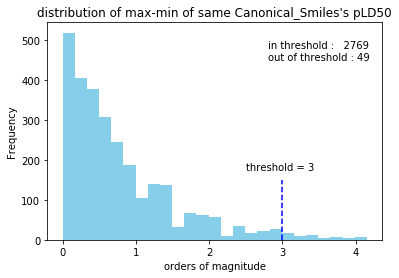

In [16]:
draw = (DataFile['pLD50-max']-DataFile['pLD50-min']).dropna()
fig = draw.plot(kind = 'hist',color = 'skyblue',bins =25,title = "distribution of max-min of same Canonical_Smiles's pLD50")
fig.set_xlabel('orders of magnitude')
fig.vlines(3,0,150,colors = 'blue',linestyle = 'dashed',label = 'threshold')
fig.text(2.5,175,'threshold = 3')
p1 = draw.loc[draw<=3]
p2 = draw.loc[draw>3]
len(p2)/len(draw),len(p2) 
fig.text(2.8,450,f'in threshold :   {len(p1)}\nout of threshold : {len(p2)}')
fig.get_figure().savefig('ptp_distribution.tiff')

In [44]:
cleandf = DataFile[['uid','cid','species','Canonical_Smiles','pLD50-final']]
total = len(cleandf)
cleandf = cleandf.dropna()
dropna = len(cleandf)
cleandf = cleandf.drop_duplicates('cid')
unique = len(cleandf)

cleandf.to_csv('unique_smiles.csv',index = False)

f'total:{total},dropna:{dropna},unique:{unique}'

'total:4145,dropna:3897,unique:2001'

In [ ]:
# [local model]


In [ ]:
# [global model]